In [1]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits()
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
# mnist = fetch_openml('mnist_784')
# type(mnist.data)

In [4]:
type(digits)

sklearn.utils._bunch.Bunch

In [5]:
type(digits.data)

numpy.ndarray

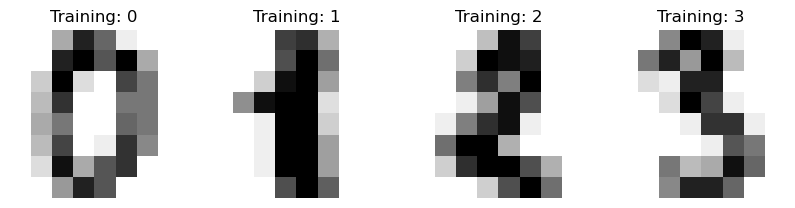

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [7]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

svc = svm.SVC(gamma='scale',class_weight='balanced',C=100)
svc.fit(X_train,y_train)
result=svc.predict(X_test)
print('Accuracy :',accuracy_score(y_test,result))
print(classification_report(y_test,result))
predicted = svc.predict(X_test)

Accuracy : 0.967741935483871
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       1.00      0.98      0.99        86
           3       0.98      0.90      0.94        91
           4       0.99      0.96      0.97        92
           5       0.94      0.97      0.95        91
           6       0.99      0.99      0.99        91
           7       0.97      0.99      0.98        89
           8       0.92      0.98      0.95        88
           9       0.93      0.97      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



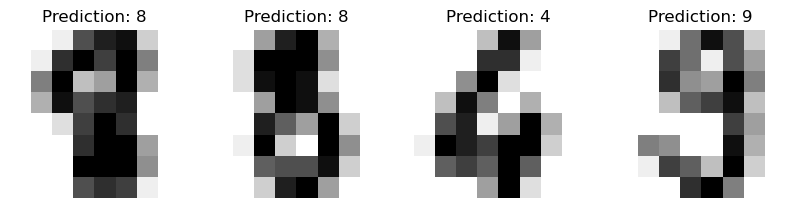

In [8]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  0  0  0  0  0  0  2  1]
 [ 1  0 84  1  0  0  0  0  0  0]
 [ 0  0  0 82  0  3  0  1  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  1  0  1 86  0]
 [ 0  0  0  1  0  1  0  1  0 89]]


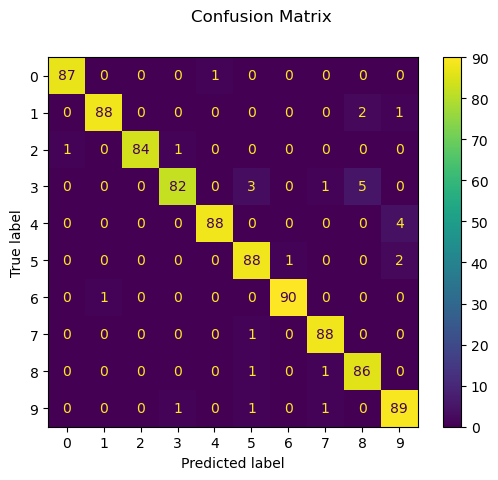

In [11]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()